# **Case Avançado**

Wall-E é um robô compactador, deixado na Terra após a fuga dos humanos graças à grande quantidade de lixo acumulado no planeta. Durante sua rotina de compactar todo o lixo que encontra e empilha-lo, um dia Wall-E encontra outra robô, muito mais tecnológica, chamada EVA, que descobrimos ser da *Axiom*, uma nave gigantesca tripulada por toda a população humana mas que está ficando pequena para suportar a superpopulação para qual estão se encaminhando. Acompanhamos essa jornada incrível com ambos os personagens, tentando entender se a Terra já está "saudável" o suficiente para abrigar vida novamente.

<center> <img alt='Wall-E e EVA' width=80% src='https://images.alphacoders.com/112/112463.jpg'/> </center>

In [1]:
# Instalando as bibliotecas que vamos usar
%pip install pandas seaborn matplotlib plotly geopandas numpy

In [2]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np # importei essa biblioteca (utilizei no item "a" da questão 5 e no item "b" da bônus)

## **Contextualização**



Para ajudar Wall-E com sua missão de compactar o lixo do planeta, precisamos entender melhor sobre ele, por isso ele baixou um arquivo .csv com algumas informações sobre o lixo.

**Descrição das Colunas do DataFrame:**
- *dropoff_site*: Local onde o lixo será descartado
- *load_id*: O número de identificação do carregamento
- *load_time*: Horário de carregamento
- *load_type*: Tipo de carregamento (ou de lixo)
- *load_weight*: Peso do carregamento de lixo
- *report_date*: Data do relatório
- *route_number*: Número de identificação da rota
- *route_type*: Tipo de rota

## **Questão 1**

### **a)** Leia o arquivo "Wall-E.csv" com nosso banco de dados, e o transforme em um Data Frame do Pandas.

In [3]:
# Transformando o arquivo "Wall-E.csv" em um Data Frame do pandas, armazenado na variável walle
walle = pd.read_csv('C:\\Users\\vinit\\Downloads\\Wall-E.csv')

# Visualização das primeiras 5 linhas do Data Frame
walle.head()

,dropoff_site,load_id,load_time,load_type,load_weight,report_date,route_number,route_type
0,MRF,328118,2009-05-27 12:55:00,RECYCLING - SINGLE STREAM,4060.0,2009-05-27,DW1,RECYCLING - SINGLE STREAM
1,BRAKER SITE,308336,2008-12-16 10:55:00,SWEEPING,NaN,2008-12-16,NW10-R,STREET CLEANING-RESIDENTIAL
2,TDS - MRF,541514,2012-09-06 13:56:00,RECYCLING - SINGLE STREAM,5060.0,2012-09-06,RHBU20,RECYCLING - SINGLE STREAM
3,TDS LANDFILL,689059,2016-03-14 07:56:00,SWEEPING,3720.0,2016-03-14,DSS04,SWEEPER DUMPSITES
4,HORNSBY BEND,108272,2004-12-02 15:29:00,YARD TRIMMING,13840.0,2004-12-02,YH08,YARD TRIMMINGS


### **b)** Com o Data Frame em mãos precisamos mexer um pouco nele: Transforme a coluna *report_date* em DateTime (com o comando do Pandas!)

In [4]:
# Convertendo a coluna "report_date" do Data Frame walle para o formato DateTime
walle['report_date'] = pd.to_datetime(walle['report_date'])

# Visualização do formato da coluna "report_date"
walle[['report_date']].dtypes

report_date    datetime64[ns]
dtype: object

### **c)** Agora precisamos limpar o data frame: retire as linhas que não tenham o peso do carregamento (*load_weight*), ou seja, aquelas com valor Na, e as últimas 2 colunas, que não usaremos. Lembre-se de resetar o índice do data frame após isso!

In [5]:
# Retirando as duas últimas colunas do Data Frame walle
walle = walle.drop(['route_number', 'route_type'], axis = 1)

# Retirando as linhas que não tem peso de carregamento
walle = walle.dropna(subset = 'load_weight')

# Resetando o índice do Data Frame
walle = walle.reset_index(drop = True)

# Verificando se tem algum valor Na restante e as colunas restantes do Data Frame
walle.isna().sum()


dropoff_site    0
load_id         0
load_time       0
load_type       0
load_weight     0
report_date     0
dtype: int64

## **Questão 2**

#### Podemos retirar algumas informações importantes do dataframe relacionados aos diferentes tipos de lixo e seus descartes, para otimizar o trabalho de Wall-E e saber quanto trabalho já foi feito na Terra.

### **a)** Agora que você já descartou os dados sujos do dataframe, conte quantos lixos temos de cada tipo na base de dados.

In [6]:
# Criando a variável que contem os valores distintos de "load_type",  os tipos de lixo
tipos_lixo = walle['load_type'].unique()

# Loop que conta quantos tipos de lixo diferentes temos na variável tipos de lixo
contador = 0
for tipo in tipos_lixo:
    contador += 1

# Print de quantos tipos de lixo a base de dados tem
print(f'A base de dados possui {contador} tipos de lixo.')

A base de dados possui 18 tipos de lixo.


### **b)** Calcule o peso médio do quanto foi descartado de cada tipo de lixo.

In [7]:
# Rode o item "a" dessa questão, por causa da variável "tipos_lixo"

# Criando as variáveis dos loops, como dicionários vazios
walle_por_tipo = {}
medias = {}

# Loop de iteração para cada tipo de lixo
for tipo in tipos_lixo:

# No dicionário "walle_por_tipo" são criados Data Frames filtrados por cada tipo de lixo
    walle_por_tipo[f'{tipo}'] = walle.loc[walle['load_type'] == tipo]

# No dicionário "medias" são adicionados, para cada tipo de lixo, o cálculo da média da coluna load_weight
# de cada Data Frame no dicionário "walle_por_tipo"
    medias[f'{tipo}'] = walle_por_tipo[f'{tipo}']['load_weight'].mean()
    
# Print da média de peso de cada tipo de lixo
    print(f'O peso médio descartado do tipo de lixo {tipo} é {medias.get(tipo)}.')

O peso médio descartado do tipo de lixo RECYCLING - SINGLE STREAM é 9894.340909776325.
O peso médio descartado do tipo de lixo SWEEPING é 11999.395781167008.
O peso médio descartado do tipo de lixo YARD TRIMMING é 11575.960831478424.
O peso médio descartado do tipo de lixo RECYCLING - COMINGLE é 3262.465580408793.
O peso médio descartado do tipo de lixo GARBAGE COLLECTIONS é 17005.31112062884.
O peso médio descartado do tipo de lixo RECYCLING - PAPER é 4405.586067485617.
O peso médio descartado do tipo de lixo BRUSH é 5847.707561168114.
O peso médio descartado do tipo de lixo BULK é 7292.02498950699.
O peso médio descartado do tipo de lixo BAGGED LITTER é 12937.642857142857.
O peso médio descartado do tipo de lixo DEAD ANIMAL é 528.0066691367173.
O peso médio descartado do tipo de lixo MULCH é 7969.176339285715.
O peso médio descartado do tipo de lixo RECYCLED METAL é 3004.2115085536548.
O peso médio descartado do tipo de lixo TIRES é 2180.424006908463.
O peso médio descartado do tipo 

## **Questão 3**

### Faça um gráfico da evolução do peso médio _anual_ ao longo do tempo (usando matplot, seaborn ou plotly)

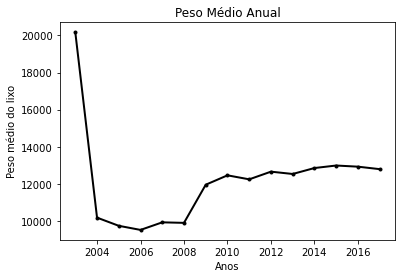

In [8]:
# Criando nova coluna no Data Frame "walle" com o ano da coluna "report_date"
walle['year_report_date'] = walle['report_date'].dt.year

# Criando tabela dinâmica com o peso médio do lixo por ano
peso_medio_ano = pd.pivot_table(walle,
              'load_weight',
              'year_report_date',
              aggfunc = 'mean')

# Resetando o índice do Data Frame criado acima
peso_medio_ano = peso_medio_ano.reset_index()

# Criando o gráfico do peso médio por ano, na cor preta com marcadores e grossura da linha = 2
plt.plot(peso_medio_ano['year_report_date'], peso_medio_ano['load_weight'],
         color = 'k',
         marker = '.',
         linewidth = 2
        )

# Nomeando o eixo x como "Anos" e o eixo y como "Peso médio do lixo"
plt.xlabel('Anos')
plt.ylabel('Peso médio do lixo')

# Título do gráfico como "Peso Médio Anual"
plt.title('Peso Médio Anual')

# Mostrando nome
plt.show()

## **Contextualização**

Que o planeta não suporta todo o lixo que a humanidade é capaz de produzir, isso é fato. Sabemos também que a população mundial cresce a cada dia, e com ela, a produção de lixo. Nesse sentido, faz-se necessário acompanhar e prever o crescimento populacional de forma a identificar quanto tempo ainda temos para salvar a Terra e evitar que cheguemos ao apocalipse igual ao presenciado pelo Wall-E.

Para tanto, vamos ajudar EVA a enfrentar seus problemas na Axiom, trabalhando  com uma base de dados contendo informações sobre a população mundial, e buscaremos fazer análises que nos apresentem insights sobre o futuro do nosso planeta. As colunas com as quais trabalharemos são:

- *country*: nome do país
- *rank*: posição do país em termos de população (em 2023)
- *area*: área total do país em quilômetros quadrados
- *landAreaKm*: área terrestre do país em quilômetros quadrados
- *cca2*: código de dois caracteres do país
- *cca3*: código de três caracteres do país
- *netChange*: variação líquida da população (%)
- *growthRate*: taxa de crescimento da população (%)
- *worldPercentage*: percentual da população mundial do país (em 2023)
- *density*: densidade populacional por quilômetro quadrado (em 2023)
- *densityMi*: densidade populacional por milha quadrada
- *place*: número representativo associado ao país
- *pop1980*: população do país em 1980
- *pop2000*: população do país em 2000
- *pop2010*: população do país em 2010
- *pop2022*: população do país em 2022
- *pop2023*: população do país em 2023
- *pop2030*: população do país em 2030
- *pop2050*: população do país em 2050

## **Questão 4**

### **a)** Inicialmente, leia o arquivo "EVA.csv" com nosso banco de dados, e o transforme em um Data Frame do Pandas.


In [9]:
# Transformando o arquivo "eva.csv" em um Data Frame do pandas, armazenado na variável eva
eva = pd.read_csv('C:\\Users\\vinit\\Downloads\\eva.csv')

eva.head()

,country,rank,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
0,India,1,3287590.0,2973190.0,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,356,696828385,1059633675,1240613620,1417173173,1428627663,1514994080,1670490596
1,China,2,9706961.0,9424702.9,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,156,982372466,1264099069,1348191368,1425887337,1425671352,1415605906,1312636325
2,United States,3,9372610.0,9147420.0,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,840,223140018,282398554,311182845,338289857,339996563,352162301,375391963
3,Indonesia,4,1904569.0,1877519.0,ID,IDN,0.0727,0.0074,0.0347,147.8196,382.8528,360,148177096,214072421,244016173,275501339,277534122,292150100,317225213
4,Pakistan,5,881912.0,770880.0,PK,PAK,0.1495,0.0198,0.0300,311.9625,807.9829,586,80624057,154369924,194454498,235824862,240485658,274029836,367808468


### **b)** Agora, apresente os cinco países que mais crescem durante o período estudado. Para isso, utilize como base a coluna *growthRate*. Dê a taxa, os nomes e em que rank estão os países.


In [10]:
# Organiza as linhas do Data Frame "eva" por ordem crescente da coluna "growthRate"
crescente_paises_growth_rate = eva.sort_values(by=['growthRate'],
                                               ascending = False)

# Resetando o índice do Data Frame
crescente_paises_growth_rate = crescente_paises_growth_rate.reset_index(drop = True)

# Loop que printa, dos 5 primeiros países do Data Frame, o ranking de cada país e sua taxa de crescimento
ranking = 0
while ranking < 5:
    print(f'O país que está em {ranking + 1}° lugar na taxa de crescimento é {crescente_paises_growth_rate.loc[ranking, "country"]}. A taxa foi de {crescente_paises_growth_rate.loc[ranking, "growthRate"]}.')
    ranking += 1

O país que está em 1° lugar na taxa de crescimento é Syria. A taxa foi de 0.0498.
O país que está em 2° lugar na taxa de crescimento é Moldova. A taxa foi de 0.0498.
O país que está em 3° lugar na taxa de crescimento é Niger. A taxa foi de 0.038.
O país que está em 4° lugar na taxa de crescimento é DR Congo. A taxa foi de 0.0329.
O país que está em 5° lugar na taxa de crescimento é Chad. A taxa foi de 0.0313.


### **c)** Por fim, apresente os cinco países menos densos. Dê sua densidade, seu nome, sua área de terra e sua população total em 2023.

In [11]:
# Organiza as linhas do Data Frame "eva" por ordem decrescente da coluna "density"
decrescente_paises_densidade = eva.sort_values(by=['density'],
                                               ascending = True)

# Resetando o índice do Data Frame
decrescente_paises_densidade = decrescente_paises_densidade.reset_index(drop = True)

# Loop que printa, dos 5 países menos densos do Data Frame, o ranking de menor densidade de cada país, sua densidade, sua área e sua população 
for ranking in range(0, 5):
    print(f"O pais em {ranking + 1}° lugar com a menor densidade é {decrescente_paises_densidade.loc[ranking,'country']}.")
    print(f"Sua densidade populacional por quilômetro quadrado é {decrescente_paises_densidade.loc[ranking,'density']}.") 
    print(f"Sua área é de {decrescente_paises_densidade.loc[ranking,'landAreaKm']} quilômetros quadrados.")
    print(f"E sua população em 2023 é de {decrescente_paises_densidade.loc[ranking,'pop2023']} habitantes.")
    print('')

O pais em 1° lugar com a menor densidade é Greenland.
Sua densidade populacional por quilômetro quadrado é 0.138.
Sua área é de 410450.0 quilômetros quadrados.
E sua população em 2023 é de 56643 habitantes.

O pais em 2° lugar com a menor densidade é Falkland Islands.
Sua densidade populacional por quilômetro quadrado é 0.3114.
Sua área é de 12173.0 quilômetros quadrados.
E sua população em 2023 é de 3791 habitantes.

O pais em 3° lugar com a menor densidade é Western Sahara.
Sua densidade populacional por quilômetro quadrado é 2.2077.
Sua área é de 266000.0 quilômetros quadrados.
E sua população em 2023 é de 587259 habitantes.

O pais em 4° lugar com a menor densidade é Mongolia.
Sua densidade populacional por quilômetro quadrado é 2.2133.
Sua área é de 1557506.8 quilômetros quadrados.
E sua população em 2023 é de 3447157 habitantes.

O pais em 5° lugar com a menor densidade é Namibia.
Sua densidade populacional por quilômetro quadrado é 3.1631.
Sua área é de 823290.0 quilômetros quad

## **Questão 5**

### **a)** A partir dos dados da população mundial projetada para 2030, crie um gráfico de pizza com a porcentagem de cada país. Agrupe todos os países com menos de 1% da população mundial na classe "Outros".

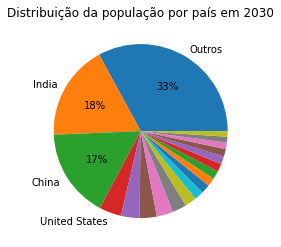

In [12]:
# Cria coluna no Data Frame "eva", que contém a porcentagem da população mundial de cada país em 2030
eva['pop2030%'] = (eva['pop2030']/eva['pop2030'].sum())*100

# Cria coluna no Data Frame "eva", que coloca o nome "Outros" se população mundial do país for menor que 1%, caso contrário coloca o nome do país 
eva['pais_outros'] = np.where(eva['pop2030%'] < 1,
                              'Outros',
                              eva['country'])

# Tabela dinâmica da porcentagem dos países, se for menor que 1% será agrupado em "Outros", de acordo com a coluna acima
pizza = pd.pivot_table(eva,
                      'pop2030%',
                      'pais_outros',
                      aggfunc= 'sum')

# Organizando o Data Frame "pizza" por ordem decrescente de "pop2030%"
pizza = pizza.sort_values(by = ['pop2030%'], ascending = False)

# Reseta o índice do Data Frame "pizza"
pizza = pizza.reset_index()

# Loop que gera uma lista dos países que possuem mais que 4% da população mundial, será usado no argumento "labels" do gráfico 
# Os páises que tem mais que 4% da população mundial terão seus nomes expostos no gráfico
pais_outros_format = []
for indice, pais in enumerate(pizza['pais_outros']):
    if pizza.loc[indice, 'pop2030%'] > 4:
        pais_outros_format.append(f'{pais}')
    else:
        pais_outros_format.append('')

# Função que será usada no argumento "autopct" do gráfico, se o país possui uma porcentagem da população mundial maior que 5% sua porcentagem aparece no gráfico 
porcentagem_aparece = lambda pop: f'{pop:.0f}%' if pop > 5 else None

# Plot do gráfico de pizza
plt.pie(pizza['pop2030%'], labels = pais_outros_format, autopct = porcentagem_aparece)

# Título do gráfico
plt.title('Distribuição da população por país em 2030')

# Mostrar gráfico
plt.show()

### **b)** A partir das projeções das populações mundiais, calcule a _taxa anual_ de variação entre os anos de 2023 e 2030 e, em seguida, entre 2030 e 2050. Apresente esses valores em box plots e contraste as diferenças de distribuição de dados. Interprete os resultados. (Tenha em mente perguntas como: as médias variaram? Os quantis indicam que mais países tem valores menos ou maiores de crescimento? O mundo está crescendo mais rápido ou menos rápido ao aproximar-se da metade do século?)

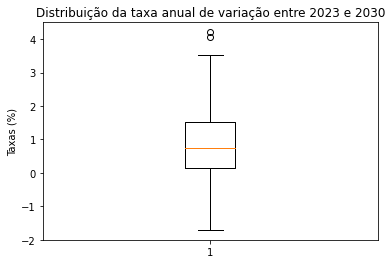

In [13]:
# Cálculo da variação anual da população entre 2023 e 2030
# como a taxa é anual divide-se por 7, já que o período de comparação é de 7 anos
eva['variacao_ano_2023_2030'] = (((eva['pop2030'] - eva['pop2023'])/eva['pop2023'])/7)*100

# Cálculo da variação anual da população entre 2030 e 2050
# como a taxa é anual divide-se por 10, já que o período de comparação é de 10 anos
eva['variacao_ano_2030_2050'] = (((eva['pop2050'] - eva['pop2030'])/eva['pop2030'])/20)*100

# Título do gráfico e eixo y do gráfico
plt.title('Distribuição da taxa anual de variação entre 2023 e 2030')
plt.ylabel('Taxas (%)')

# Plot do box plot da variação anual entre 2023 a 2030
plt.boxplot(eva['variacao_ano_2023_2030'])

# Mostrar gráfico
plt.show()

# Pode se perceber que a maior parte dos países tem a taxa entre 0% e 1,5%, e que temos 2 outliers na parte
# de cima do gráfico. A mediana ficou por volta de 0,6%.

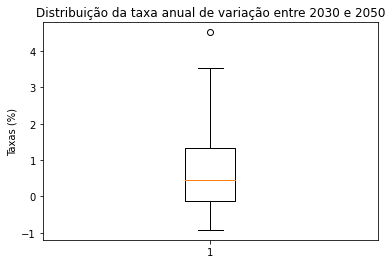

In [14]:
# Título do gráfico e eixo y do gráfico
plt.title('Distribuição da taxa anual de variação entre 2030 e 2050')
plt.ylabel('Taxas (%)')

# Plot do box plot da variação anual entre 2023 a 2030
plt.boxplot(eva['variacao_ano_2030_2050'])

# Mostrar gráfico
plt.show()

# Pode se perceber que a maior parte dos países tem a taxa entre -0,6% e 1,4%, e que temos 1 outlier na parte 
# de cima do gráfico. A mediana também ficou por volta de 0,4%.

# As medianas estão bem próximas nos dois gráficos. 
# Ao comparar os gráficos pode se concluir que a população mundial está crescendo de forma mais lenta de 2030 a 2050. 

### **c)** O principal objetivo desse exercício é trabalhar com a ideia de unir dataframes distintos e vasculhar possíveis problemas. Além disso, apresentamos uma forma de visualização bastante útil para alguns casos, que é o emprego de mapas.  
### Nós já deixamos parte do código abaixo, com comentários do que ele faz. A partir do que lhe é fornecido, faça a união do dataframe contendo a informação dos limites de cada país no mapa com o seus dados de taxa de crescimento entre 2023-2030. Em seguida, plote um mapa com essas taxas em alguma escala de cor (busque os colormaps do pacote de Matplotlib. Eles podem ser bem úteis aqui).


In [15]:
import geopandas as gpd
import numpy as np

# Aciona arquivo com limites espaciais dos países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['name'] = world['name'].str.replace('United States of America','United States')
world['name'] = world['name'].str.replace('Dominican Rep.', 'Dominican Republic')

# O formato do arquivo é Geopandas, que, como o nome sugere,
# lembra muito o Pandas, organizando os dados em formato de tabela

# A principal diferença é a presença de uma coluna chamada "geometry"
# Ela contém as coordenadas geoógraficas, ou seja, onde a informação está em um mapa.

# Você pode usar as mesmas funções que usaria em um DataFrame em um GeoDataFrame
# Analise as primeiras linhas e colunas do geodataframe que criamos ('world')

C:\Users\vinit\AppData\Local\Temp/ipykernel_2744/402369090.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\vinit\AppData\Local\Temp/ipykernel_2744/402369090.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  world['name'] = world['name'].str.replace('Dominican Rep.', 'Dominican Republic')


In [16]:
# -- Obs: Seu DataFrame final deve ter o nome 'world_data'

# Mesclando o Data Frame do geopandas com o Data Frame "eva", pelo nome do país
world_data = world.merge(eva,
         'left',
         right_on= 'country',
         left_on= 'name')

# Cria coluna "rate23-30" igual a coluna "variacao_ano_2023_2030"
world_data['rate23-30'] = world_data['variacao_ano_2023_2030']

# Média da coluna "rate23-30"
media_rate_23_30 = world_data['rate23-30'].mean()

# Preenchendo os valores NA da coluna "rate23-30" com a média da coluna
preencher_media_rate = {'rate23-30': media_rate_23_30}
world_data = world_data.fillna(preencher_media_rate)

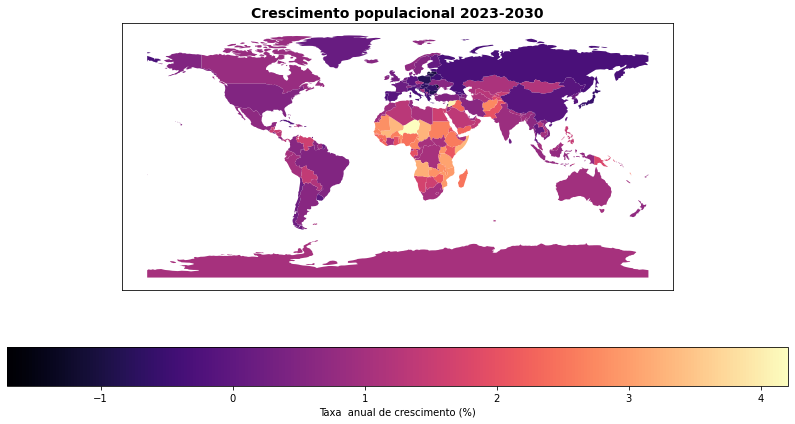

In [17]:
# Rode o código e veja a saída!

fig, ax = plt.subplots(figsize=(14, 7))

world_data.plot(ax=ax, column='rate23-30', cmap='magma', legend=True, 
           legend_kwds={'label': "Taxa  anual de crescimento (%)", 'orientation': "horizontal"})

plt.title('Crescimento populacional 2023-2030', loc='center', fontweight="bold", fontsize=14)
plt.xticks([])
plt.yticks([])
plt.xlabel('')  
plt.ylabel('')  
plt.show()

## **Questão Bônus**

### **a)** Crie um novo DataFrame com 2 colunas: o Ano e a População Mundial daquele ano (ou seja, a soma de todas as populações dos países).

In [18]:
# Data Frame com a população mundial total de cada ano
pop_mundial_ano = pd.DataFrame(eva[['pop1980', 'pop2000', 'pop2010', 'pop2022', 'pop2023', 'pop2030','pop2050']].sum())

# Resetando o índice do Data Frame
pop_mundial_ano = pop_mundial_ano.reset_index()

# Renomeando as colunas do Data Frame
pop_mundial_ano.columns = ['PopAno','Pop_mundial']

# Coluna Ano com os anos de cada população e no formato de int
pop_mundial_ano['Ano'] = pop_mundial_ano['PopAno'].str[-4:]
pop_mundial_ano = pop_mundial_ano[['Ano', 'Pop_mundial']]
pop_mundial_ano['Ano'] = pop_mundial_ano['Ano'].astype(int)
pop_mundial_ano

,Ano,Pop_mundial
0,1980,4442400374
1,2000,6147055703
2,2010,6983785000
3,2022,7973413043
4,2023,8043615390
5,2030,8544417648
6,2050,9707789237


### **b)** Faça um gráfico de dispersão da população mundial (com as cores do arco-íris de acordo com o ano) e ajuste uma reta de regressão no gráfico.

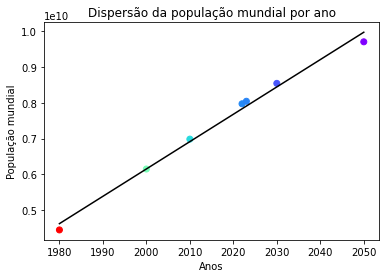

In [19]:
# Plot de gráfico scatter com as cores de arco-íris
plt.scatter(pop_mundial_ano['Ano'],
            pop_mundial_ano['Pop_mundial'],
            c= np.arctan2(pop_mundial_ano['Ano'], pop_mundial_ano['Pop_mundial']),
            cmap = 'rainbow')

# Calculando os parâmetros da regressão linear
a, b = np.polyfit(pop_mundial_ano['Ano'],
                  pop_mundial_ano['Pop_mundial'],
                  1)

# Plotando a linha da regressão do gráfico
plt.plot(pop_mundial_ano['Ano'],
         a*pop_mundial_ano['Ano'] + b,
         c = 'k')

# Títulos e eixo dos títulos
plt.title('Dispersão da população mundial por ano')
plt.xlabel('Anos')  
plt.ylabel('População mundial') 

# Mostrar gráfico
plt.show()